In [2]:
from corespray import corespraydf
from galpy.potential import MWPotential2014
from galpy.util import conversion
from galpy.orbit import Orbit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML
%matplotlib inline

In [3]:
o=Orbit.from_name('M3')

In [4]:
ts=np.linspace(0,1,1000)
o.integrate(ts,MWPotential2014)
print(o.Tp(),o.Tr())

0.3787798594866931 0.24862258502956833


In [5]:
ro,vo=8.,220.
to=conversion.time_in_Gyr(ro=ro,vo=vo)*1000.


In [6]:
#Globular Cluster NGC 6397
gcname='NGC6397'
mu0=0.
sig0=5.3
vesc0=21.1
logrho0=6.41
rho0=10.0**6.41

mgc=1.0e5
rgc=3.
W0=5.

mmin=0.1
mmax=1.4
alpha=-1

In [7]:
cspray=corespraydf(gcname,MWPotential2014,mu0,sig0,vesc0,rho0,mgc,rgc,W0,mmin,mmax,alpha,verbose=True)

Sample Binary Energies between:  6.696032589494918e+36  and  1.0901929396648558e+40  J


In [8]:
#Sample nstar stars for the distribution function
#Set binary = True if you want to keep track of binary kicks
os=cspray.sample(1000,nstar=100,binaries=True)

ValueError: setting an array element with a sequence.

In [ ]:
#Bindx will tell you what binaries were given kicks that also resulted in escapeing the cluster
cspray.bindx

In [ ]:
#Plot R and z of escaped stars and binaries
plt.plot(os.R(),os.z(),'.')
plt.plot(cspray.obf.R()[cspray.bindx],cspray.obf.z()[cspray.bindx],'.')

plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')

plt.show()

In [ ]:
plt.plot(cspray.tesc,cspray.vesc,'.')
plt.plot(cspray.tesc[cspray.bindx],cspray.vescb[cspray.bindx],'.')

plt.xlabel('Escape Time (Myr)')
plt.ylabel('Escape Velocity (km/s)')

In [ ]:
cspray.animate(frames=100,interval=50,xlim=(-15,15),ylim=(-15,15))

In [9]:
HTML(cspray.anim.to_jshtml())


AttributeError: 'corespraydf' object has no attribute 'anim'

In [10]:
cspray.snapout()

AttributeError: 'corespraydf' object has no attribute 'of'

In [11]:
plt.plot(os.x(),os.y(),'.')
plt.plot(cspray.obf.x()[cspray.bindx],cspray.obf.y()[cspray.bindx],'.')

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.show()
plt.close()

NameError: name 'os' is not defined

In [12]:
plt.plot(os.ra(),os.dec(),'.')
plt.plot(cspray.obf.ra()[cspray.bindx],cspray.obf.dec()[cspray.bindx],'.')

plt.xlabel('Ra (degree)')
plt.ylabel('Dec (degree)')
plt.show()
plt.close()

NameError: name 'os' is not defined

In [13]:
plt.plot(os.pmra(),os.pmdec(),'.')
plt.plot(cspray.obf.pmra()[cspray.bindx],cspray.obf.pmdec()[cspray.bindx],'.')

plt.xlabel('pmra (mas/yr)')
plt.ylabel('pmdec (mas/yr)')
plt.show()
plt.close()

NameError: name 'os' is not defined

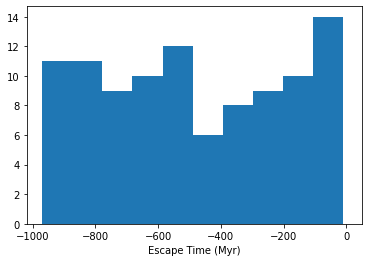

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 100

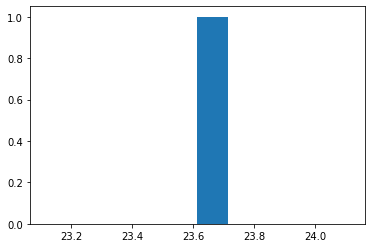

In [14]:
plt.hist(cspray.tesc)
plt.hist(cspray.tesc[cspray.bindx])

plt.xlabel('Escape Time (Myr)')
plt.show()
plt.close()

plt.hist(cspray.vesc)
plt.hist(cspray.vescb[cspray.bindx])
plt.xlabel('Escape Velocity (km/s)')
plt.show()
plt.close()

In [ ]:
plt.plot(cspray.vesc[cspray.bindx],cspray.vescb[cspray.bindx],'o')
plt.xlabel('vesc star')
plt.ylabel('vesc binary')
plt.xlim(0,250)
plt.ylim(0,250)

In [ ]:
((cspray.mb1+cspray.mb2)/cspray.mstar)[cspray.bindx]

In [ ]:
ts=np.linspace(0,1,1000)
os.integrate(ts,MWPotential2014)

jr,jp,jz=os.jr(),os.jp(),os.jz()


In [15]:
cspray.obf.integrate(ts,MWPotential2014)
jrb,jpb,jzb=cspray.obf.jr(),cspray.obf.jp(),cspray.obf.jz()


AttributeError: 'corespraydf' object has no attribute 'obf'

In [16]:
vindx=cspray.vesc<1.0e10

NameError: name 'jr' is not defined

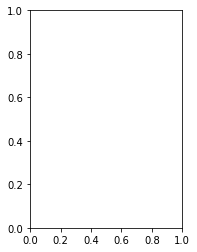

In [17]:
plt.subplot(1,2,1)

plt.plot(jr[vindx],jp[vindx],'.',alpha=1,label='Single Stars')
plt.plot(jrb[cspray.bindx],jpb[cspray.bindx],'.',alpha=1,label='Binary Stars')

plt.plot(cspray.o.jr(),cspray.o.jp(),'o',label='GC')

plt.legend()
plt.xlabel('Jr')
plt.ylabel('Jp')
plt.xlim(0,1000)

plt.subplot(1,2,2)

plt.plot(jr[vindx],jz[vindx],'.',alpha=1)
plt.plot(jrb[cspray.bindx],jzb[cspray.bindx],'.',alpha=1)

plt.plot(cspray.o.jr(),cspray.o.jz(),'o')

plt.xlabel('Jr')
plt.ylabel('Jz')

plt.xlim(0,1000)

plt.tight_layout()

plt.show()
plt.close()

In [ ]:
jrb[cspray.bindx]

In [ ]:
jpb[cspray.bindx]

In [ ]:
jzb[cspray.bindx]

In [ ]:
cspray.obf.vx()[cspray.bindx]

In [ ]:
cspray.obf.vy()[cspray.bindx]

In [ ]:
cspray.obf.vz()[cspray.bindx]